<a href="https://colab.research.google.com/github/tommasoghisini/IndividualAssignment30412/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Individual Assignments - BEMACS 30412

*Tommaso Ghisini - 3082046*

### Task Description

This dataset is composed of 1300 samples with 31 features each. The first column
is the sample id. The second column in the dataset represents the label. There
are 4 possible values for the labels. The remaining columns are numeric
features, except for the last column which is categorical (with 3 categories).

Notice that the classes are unbalanced: some labels are more frequent than
others. You need to decide whether to take this into account, and if so how.

Your task is the following: you should compare the performance of Logistic
Regression (implemented by `sklearn.linear_model.LogisticRegression`) with that of
a Random Forest (implemented by `sklearn.ensemble.RandomForestClassifier`). Try to
optimize both algorithms' parameters and determine which one is best for this
dataset. At the end of the analysis, you should have chosen an algorithm and its
optimal set of parameters: write this choice explicitly in the conclusions of
your notebook.

Your notebook should detail the procedure you have used to choose the optimal
parameters (graphs are a good idea when possible/sensible).

The notebook will be evaluated not only based on the final results, but also on
the procedure employed, which should balance practical considerations (one may
not be able to exhaustively explore all possible combinations of the parameters)
with the desire for achieving the best possible performance in the least amount
of time.

Bonus points may be assigned for particularly clean/nifty code and/or well-
presented results.

You are also free to attempt other strategies beyond the one in the assignment
(which however is mandatory!).

### Instructions (w/ or w/o Google Colaboratory)
If the code is run locally, uncomment the following cell so that the dataset can be opened. 
Importing the dataset, using `os.getcwd()` to get current working directory and then finding the `.csv` in the `mldata_0003082046` subfolder

In [ ]:
# data = pd.read_csv(os.getcwd()+"/mldata_0003082046/mldata_0003082046.csv")

If instead the code is run on Google Colaboratory use the following cell to mount the Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Common imports:

In [12]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) #to filter warnings due to divverent python versions
plt.style.use("dark_background")

### Data Import and Visualization

In [13]:
data = pd.read_csv("/content/drive/My Drive/mldata_0003082046.csv")

In [14]:
data.head()

,Unnamed: 0,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,categorical_feature_1
0,0,2,1.317261,8.358737,0.012758,-5.217166,4.527006,-1.406090,-0.342143,0.348081,-3.012028,-0.030038,-0.765012,-0.443708,1.043832,-0.091771,1.176236,-0.880417,1.568592,-1.706071,-0.379981,-0.318466,-1.169511,1.356334,0.535998,-0.131434,2.329964,-0.684323,1.994169,1.934354,0.406818,-4.655728,C
1,1,0,7.340127,-3.555115,-1.402374,3.795976,2.906873,0.834305,-0.474424,0.379163,3.010350,1.085285,-2.457510,-2.252354,0.027248,4.244418,0.426144,0.242195,-1.388683,0.975758,-2.107836,-4.199434,7.458774,-1.238011,3.314475,0.830218,-3.315989,5.678754,0.868932,-5.463458,1.515240,-2.683021,C
2,2,3,1.669893,-0.156661,-0.443940,1.679536,2.275529,-0.015023,0.179829,1.107741,4.331329,-0.422255,-0.962114,-2.953092,-1.631581,-2.381880,0.093982,2.171647,2.086418,0.850709,-0.477933,-0.293551,1.296276,0.019973,2.025434,-1.539228,-0.124959,0.729042,-0.933219,1.335045,0.917811,4.190699,A
3,3,0,-0.623603,0.122445,0.813246,5.045944,-2.038502,0.568875,0.582684,-1.882058,0.380607,0.742172,2.260215,0.825563,0.804980,5.700392,0.493337,0.994722,3.863302,6.243809,-0.247652,0.429865,0.037361,0.926294,-1.737447,-0.713846,-1.130351,-3.553304,-0.667542,-0.218199,-4.047490,11.728424,C
4,4,1,0.848504,-6.271396,-1.764746,-0.718353,1.989970,-1.594145,-0.719358,3.330150,-0.141448,-4.353223,3.801571,-1.556320,0.222998,-1.515106,-0.270024,0.574702,-2.220203,-4.809569,-0.853683,-3.725578,-2.303464,-0.515869,2.030722,1.743685,-3.004193,-4.374810,0.306283,5.932732,3.316302,3.973014,B


we drop the "Unnamed: 0" since it represents the id which are already added when the data is imported

In [15]:
data.drop(columns=["Unnamed: 0"], inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   label                  1300 non-null   int64  
 1   feature_1              1300 non-null   float64
 2   feature_2              1300 non-null   float64
 3   feature_3              1300 non-null   float64
 4   feature_4              1300 non-null   float64
 5   feature_5              1300 non-null   float64
 6   feature_6              1300 non-null   float64
 7   feature_7              1300 non-null   float64
 8   feature_8              1300 non-null   float64
 9   feature_9              1300 non-null   float64
 10  feature_10             1300 non-null   float64
 11  feature_11             1300 non-null   float64
 12  feature_12             1300 non-null   float64
 13  feature_13             1300 non-null   float64
 14  feature_14             1300 non-null   float64
 15  feat

In [17]:
data["categorical_feature_1"].value_counts()

C    680
A    435
B    185
Name: categorical_feature_1, dtype: int64

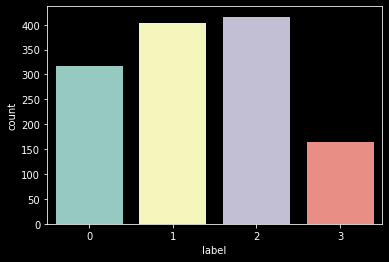

In [18]:
sns.countplot(x="label", data=data)
plt.show()

In [19]:
data.describe()

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,1.328462,0.485006,-0.188724,0.064082,-0.209710,0.727291,0.136622,0.068518,-0.102001,-0.008617,-0.634683,-0.594289,-0.012555,-0.014205,0.832540,0.103182,0.155925,0.259276,-0.171561,0.117787,-0.035311,0.636862,0.107799,0.843886,0.013545,-0.168853,-0.617460,0.099473,-0.651911,0.324557,0.514403
std,0.980466,2.646078,5.770547,1.037813,2.664411,2.574071,1.024913,0.993728,2.544534,2.503960,2.609109,2.535811,2.529016,2.585610,2.575421,1.023611,0.997988,2.703089,5.046798,1.016914,2.708710,2.266136,1.001673,2.527775,0.993996,2.724501,2.614131,1.004445,2.443311,2.590095,6.249319
min,0.000000,-7.678960,-14.996620,-4.013138,-9.309243,-7.265789,-3.299237,-3.165439,-8.966481,-9.070622,-9.040763,-9.968950,-8.685565,-9.496122,-7.184087,-3.886036,-2.816371,-8.061023,-18.018036,-3.679458,-9.495588,-7.102880,-2.959264,-6.275450,-2.960987,-9.898176,-9.354425,-2.787296,-8.531747,-8.160880,-16.551214
25%,1.000000,-1.236314,-4.076933,-0.633110,-2.063790,-1.039900,-0.545490,-0.595175,-1.800105,-1.653267,-2.347375,-2.270984,-1.695332,-1.639605,-0.748003,-0.552662,-0.526040,-1.582098,-3.726317,-0.543231,-1.804817,-0.869444,-0.570739,-0.877840,-0.671149,-2.025140,-2.404387,-0.587660,-2.244586,-1.411985,-3.418540
50%,1.000000,0.525535,-0.278050,0.027111,-0.190993,0.707304,0.123436,0.052528,-0.131215,-0.037080,-0.568432,-0.740954,-0.064889,-0.075388,0.810113,0.095431,0.121553,0.363690,-0.170582,0.105159,0.059464,0.694182,0.099103,0.759531,0.018101,-0.201987,-0.665086,0.132621,-0.666219,0.224516,0.370101
75%,2.000000,2.193712,3.760076,0.754779,1.641627,2.441596,0.808366,0.724697,1.692596,1.668456,1.076399,1.106410,1.670692,1.696636,2.432573,0.787077,0.808226,2.044090,3.075266,0.772127,1.778254,2.065364,0.780220,2.549565,0.680766,1.700169,1.078330,0.802862,0.962626,1.977101,4.469548
max,3.000000,9.887883,15.953680,3.075108,9.664288,10.738788,3.258320,2.923708,9.733426,8.281138,7.786604,9.810725,9.601417,9.260673,10.145004,3.456458,3.156076,9.209270,17.493228,3.335998,9.758739,7.709641,3.293299,10.100711,3.446536,7.156686,9.335819,3.263826,6.220341,9.928803,25.588489


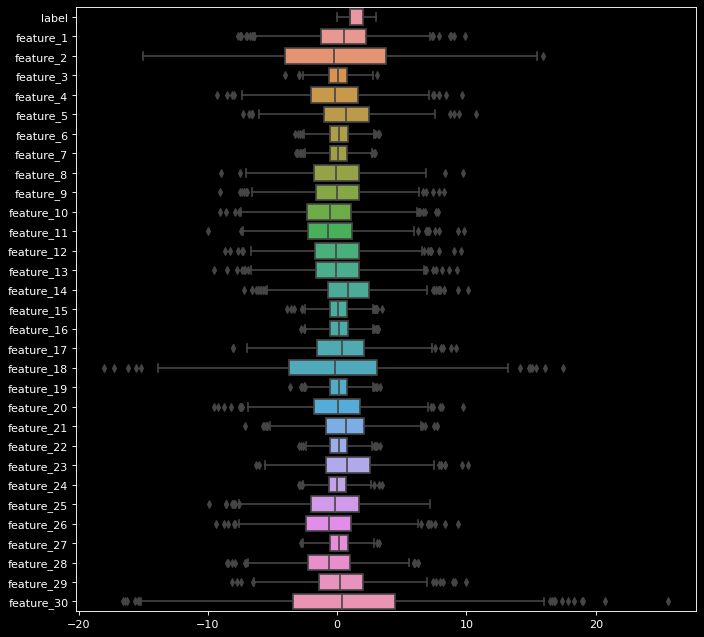

In [20]:
plt.figure(figsize=(10,10), dpi=80)
sns.boxplot(data=data, orient="h")
plt.show()

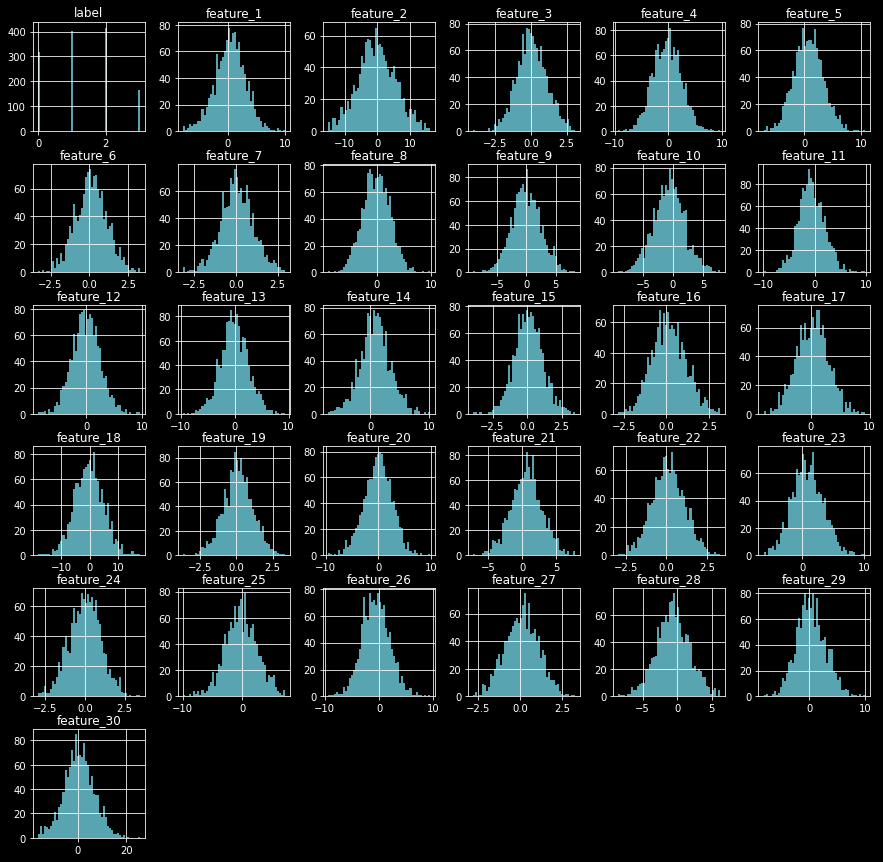

In [21]:
data.hist(bins=50,figsize=(15,15), color='#58A4B0', )
plt.show()


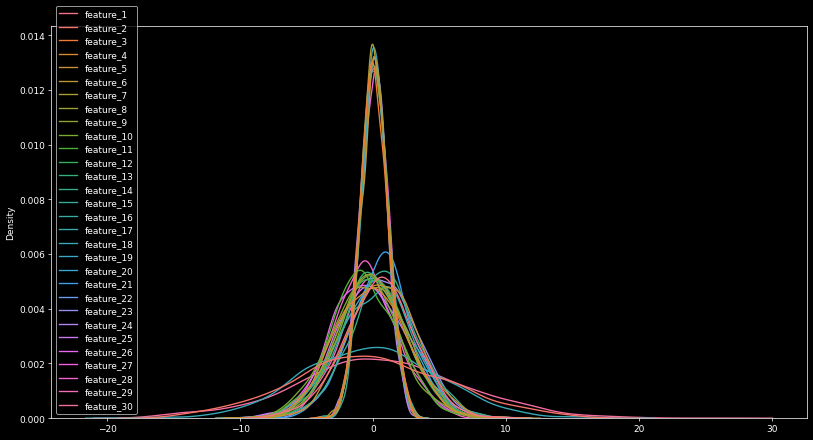

In [22]:
plt.figure(figsize=(15,8), dpi=65)
sns.kdeplot(data=data.drop(columns=["label"]))
plt.show()

In [23]:
corr_matrix = data.corr()
corr_matrix["label"].sort_values(ascending=False)

label         1.000000
feature_25    0.104719
feature_28    0.091055
feature_10    0.078617
feature_11    0.070181
feature_2     0.055968
feature_29    0.052674
feature_5     0.035174
feature_23    0.032243
feature_19    0.029727
feature_15    0.016574
feature_22    0.016276
feature_6     0.008558
feature_3     0.004030
feature_27   -0.002473
feature_17   -0.006647
feature_1    -0.025644
feature_24   -0.026356
feature_26   -0.032871
feature_12   -0.041102
feature_7    -0.041671
feature_8    -0.042614
feature_16   -0.044571
feature_4    -0.075140
feature_30   -0.082865
feature_20   -0.092506
feature_9    -0.098286
feature_14   -0.147186
feature_18   -0.186736
feature_21   -0.210090
feature_13   -0.226295
Name: label, dtype: float64

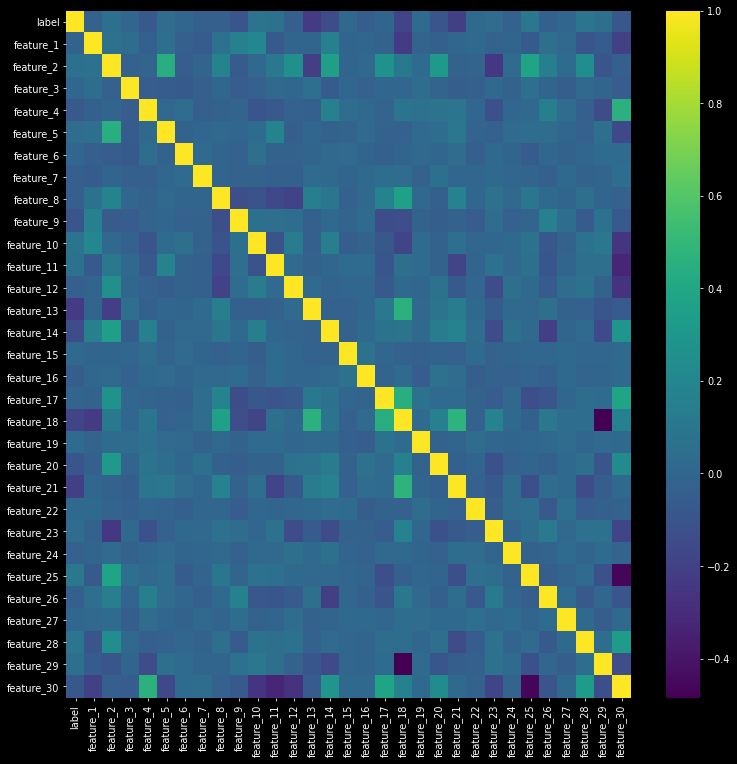

In [24]:
df = data
plt.figure(figsize=(13,13), dpi=70)
sns.heatmap(corr_matrix, cmap="viridis", annot=False)
plt.show()

### Data Preparation

I now translate the categorical feature, after have tried both with the OneHotEncoder and the OrdinalEncoder I chose the last one since it seemed in this case to offer better results.

In [25]:
from sklearn.preprocessing import OrdinalEncoder

categorical = data[["categorical_feature_1"]]

encoder = OrdinalEncoder()
data["categorical_feature_1"] = encoder.fit_transform(categorical)

In [26]:
data["categorical_feature_1"].head()

0    2.0
1    2.0
2    0.0
3    2.0
4    1.0
Name: categorical_feature_1, dtype: float64

Data is rescaled using the MinMaxScaler from the sklearn.preprocessing module. Also in this case before chosing the scaler I've tried multiple options.

In [27]:
from sklearn.preprocessing import MinMaxScaler

data_scaled = data.copy()

col_names = list(data.columns)[1:-1]
features = data_scaled[col_names]
scaler = MinMaxScaler().fit(features.values)
features = scaler.transform(features.values)

data_scaled[col_names] = features


In [28]:
data_scaled.head()

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,categorical_feature_1
0,2,0.512114,0.754608,0.567968,0.215673,0.654989,0.288697,0.463660,0.498107,0.349163,0.535480,0.465323,0.450695,0.561927,0.409272,0.689449,0.324147,0.557583,0.459346,0.470315,0.476626,0.400564,0.690213,0.415937,0.441598,0.716989,0.463884,0.790178,0.709466,0.473623,0.282287,2.0
1,0,0.854968,0.369673,0.368323,0.690711,0.565004,0.630348,0.441936,0.499770,0.696239,0.601761,0.379755,0.351792,0.507729,0.659498,0.587291,0.512113,0.386348,0.534867,0.224023,0.275063,0.983064,0.275288,0.585603,0.591680,0.385942,0.804333,0.604223,0.207990,0.534897,0.329100,2.0
2,3,0.532187,0.479477,0.503538,0.579164,0.529938,0.500829,0.549382,0.538731,0.772368,0.512172,0.455358,0.313473,0.419290,0.277118,0.542053,0.835172,0.587566,0.531345,0.456353,0.477920,0.567031,0.476483,0.506888,0.221889,0.573046,0.539504,0.306402,0.668840,0.501871,0.492218,0.0
3,0,0.401629,0.488495,0.680900,0.756590,0.290331,0.589871,0.615542,0.378848,0.544684,0.581370,0.618269,0.520104,0.549193,0.743517,0.596442,0.638112,0.690453,0.683215,0.489178,0.515492,0.482041,0.621434,0.277110,0.350703,0.514095,0.310382,0.350308,0.563551,0.227389,0.671092,2.0
4,1,0.485429,0.281911,0.317200,0.452783,0.514078,0.260019,0.401712,0.657577,0.514598,0.278566,0.696195,0.389854,0.518165,0.327137,0.492477,0.567786,0.338200,0.371951,0.402793,0.299673,0.324011,0.390783,0.507211,0.734242,0.404224,0.266429,0.511241,0.980504,0.634460,0.487052,1.0


In [29]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data_scaled, test_size=0.2, random_state=42, shuffle=True)

In [30]:
train_set_features = train_set.drop(columns=["label"])
train_set_targets = train_set["label"]

We can see that the labels of the training set are still unbalanced.

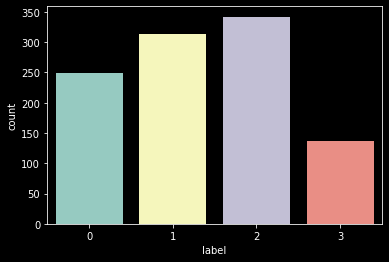

In [31]:
sns.countplot(x="label", data=train_set)
plt.show()

### Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=1, solver="newton-cg", random_state=42, penalty='l2', max_iter=500)
log_reg.fit(train_set_features, train_set_targets)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000],
    'max_iter' : [500, 1000],
    'penalty': ['l2'],
    'solver' : ['newton-cg', 'lbfgs']
}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=12, scoring='accuracy', refit='True', verbose=0)
grid.fit(train_set_features, train_set_targets)
grid.best_params_

{'C': 100, 'max_iter': 500, 'penalty': 'l2', 'solver': 'newton-cg'}

#### Metrics

The metrics relative to the Logistic Regression Model are now presented

In [34]:
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix

In [35]:
test_set_features = test_set.drop(columns=["label"])
test_set_targets = test_set["label"]

In [36]:
predictions = log_reg.predict(test_set_features)

In [37]:
accuracy = accuracy_score(test_set_targets, predictions)
accuracy

0.6423076923076924

Classification Report and Confusion Matrix are now plotted:

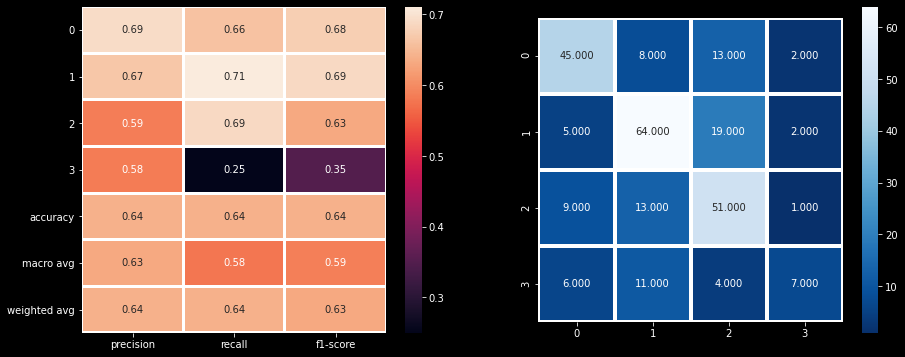

In [38]:
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
clf_report = classification_report(test_set_targets, predictions, output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, linewidths=2, annot=True)

ax2 = fig.add_subplot(122)
cm = confusion_matrix(test_set_targets, predictions)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=3, square = True, cmap = 'Blues_r')
plt.show()

### Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(max_depth=105, n_estimators=1300,
                                     bootstrap=False, max_features='sqrt')
rand_forest.fit(train_set_features, train_set_targets)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=105, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

GridSearch may take a while, especially for very complex parameters grid.

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1000, stop = 2000, num = 11)]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 200, num = 11)]
max_depth.append(None)

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth}
              
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='accuracy', refit='True', verbose=0)
grid.fit(train_set_features, train_set_targets)
grid.best_params_

To better have an idea of the trees that are used in the random forest we can visualize the first one.

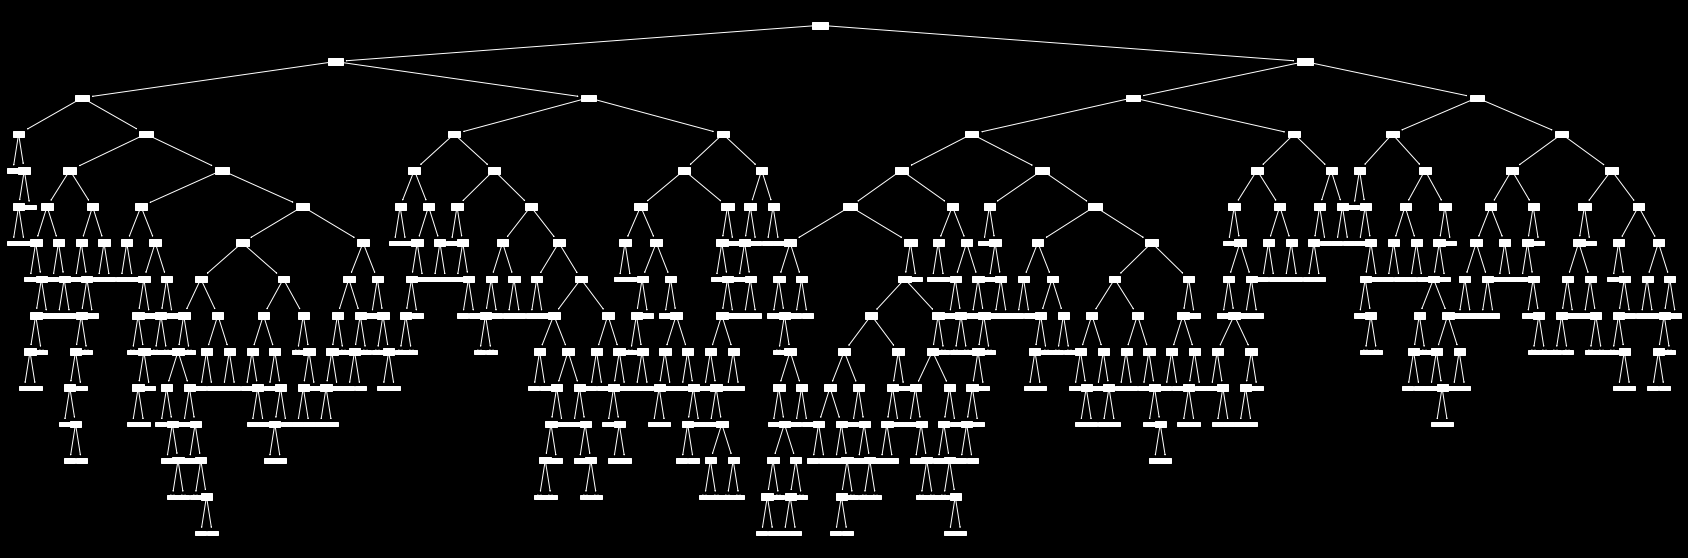

In [40]:
from sklearn import tree
len(rand_forest.estimators_)
plt.figure(figsize=(30,10))
_ = tree.plot_tree(rand_forest.estimators_[0], filled=False)

#### Metrics

The metrics relative to the Random Forest Model are now presented

In [43]:
test_set_features = test_set.drop(columns=["label"])
test_set_targets = test_set["label"]

In [44]:
predictions = rand_forest.predict(test_set_features)

In [45]:
accuracy = accuracy_score(test_set_targets, predictions)
accuracy

0.75

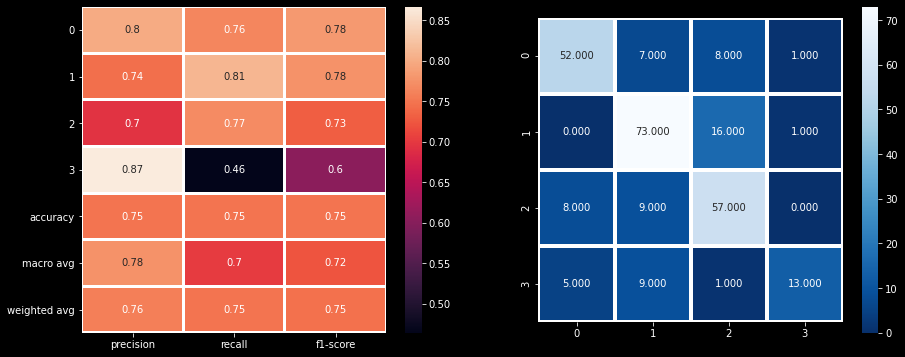

In [46]:
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
clf_report = classification_report(test_set_targets, predictions, output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, linewidths=2, annot=True)

ax2 = fig.add_subplot(122)
cm = confusion_matrix(test_set_targets, predictions)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=3, square = True, cmap = 'Blues_r');

## Dealing with Unbalanced Data

We now try multiple approaches for the unbalanced labels:
1. Logistic Regression with class_weight
2. Random Forest with class_weight
3. Oversampling and Undersampling

In [47]:
train_set, test_set = train_test_split(data_scaled, test_size=0.2, random_state=42, shuffle=True)
test_set_features = test_set.drop(columns=["label"])
test_set_targets = test_set["label"]

### Logistic Regression with class_weight


Taking into consideration the weights of each class the Logistic Regression Model increases in accuracy on average by almost $10\%$

In [48]:
log_reg = LogisticRegression(C=1, solver="newton-cg", random_state=42,
                             penalty='l2', max_iter=500, class_weight='balanced')
log_reg.fit(train_set_features, train_set_targets)

predictions = log_reg.predict(test_set_features)
accuracy

0.75

### Random Forest with class_weight


In the Random Forest Model instead taking into consideration the weights of the labels doesn't seem to improve accuracy. Sometimes it might reduce it!

In [49]:
rand_forest = RandomForestClassifier(max_depth=105, n_estimators=1300,
                                     bootstrap=False, max_features='sqrt', class_weight='balanced')
rand_forest.fit(train_set_features, train_set_targets)

predictions = rand_forest.predict(test_set_features)

accuracy = accuracy_score(test_set_targets, predictions)
accuracy

0.7538461538461538

### Oversampling and Undersampling

I now try multiple approaches and techniques of oversampling and undersampling. The following cells takes around a minute to run, but it allow to easily compare the model accuracy with different techniques of sampling

In [50]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler


samplers = dict()
samplers["RandomOverSampler"] = RandomOverSampler()
samplers["BorderlineSMOTE"] = BorderlineSMOTE()
samplers["RandomUnderSampler"] = RandomUnderSampler()
samplers["SVMSMOTE"] = SVMSMOTE()
samplers["SMOTE"] = SMOTE()

best = [0, None]

for sampler in samplers:

  upscaled_data = train_set.copy()

  col_names = list(train_set.columns)[1:]
  features = train_set[col_names]
  targets = train_set.label

  features_sm, targets_sm=samplers[sampler].fit_sample(features, targets)
  train_balanced=pd.concat([pd.DataFrame(features_sm), pd.DataFrame(targets_sm)], axis=1)
  labels = train_balanced.iloc[:,-1]
  train_balanced["label"]=labels

  train_set_features = train_balanced.drop(columns=["label"])
  train_set_features = train_set_features.iloc[: , :-1]
  train_set_targets = train_balanced["label"]

  rand_forest = RandomForestClassifier(max_depth=105, n_estimators=1300, min_samples_split=7,
                                     bootstrap=True, max_features='sqrt')
  rand_forest.fit(train_set_features, train_set_targets)
  predictions = rand_forest.predict(test_set_features)

  accuracy = accuracy_score(test_set_targets, predictions)

  if accuracy > best[0]:
    best[0] = accuracy
    best[1] = sampler

  print(f'With {sampler} the accuracy of the model is: {accuracy}')
print(f'The best performing model is: {best[1]}')

With RandomOverSampler the accuracy of the model is: 0.7307692307692307
With BorderlineSMOTE the accuracy of the model is: 0.7461538461538462
With RandomUnderSampler the accuracy of the model is: 0.6961538461538461
With SVMSMOTE the accuracy of the model is: 0.7307692307692307
With SMOTE the accuracy of the model is: 0.7076923076923077
The best performing model is: BorderlineSMOTE


SMOTE techniques usually are the ones performing the best in particular, `SVMSMOTE` which adopts Supported Vector Machines to perform the Synthetic Minority-Oversampling Technique. We now visualize the classification report and the confusion matrix of the best performing model

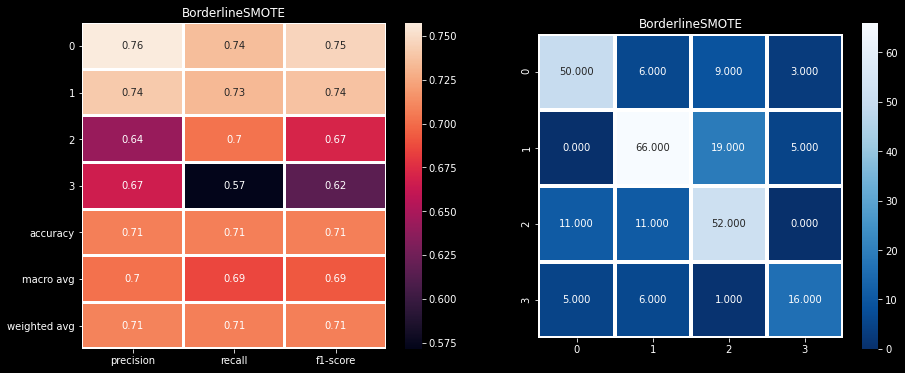

In [51]:
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
clf_report = classification_report(test_set_targets, predictions, output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, linewidths=2, annot=True)

plt.title(best[1])

ax2 = fig.add_subplot(122)
cm = confusion_matrix(test_set_targets, predictions)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=3, square = True, cmap = 'Blues_r');

plt.title(best[1])
plt.show()

## Alternative models

In [52]:
train_set, test_set = train_test_split(data_scaled, test_size=0.2, random_state=42, shuffle=True)
test_set_features = test_set.drop(columns=["label"])
test_set_targets = test_set["label"]

When comparing Alternative Models RandomForestRegressor and the Supported Vector Machine seems to be the ones achieving the lowest MSE

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

models=dict()

models["Support Vector Machine Regressor"]=SVR()
models["Gradient Boosting Regressor"]=GradientBoostingRegressor()
models["RandomForestRegressor"]=RandomForestRegressor()
models["RandomForestClassifier"]=RandomForestClassifier()
models["Stochastic Gradient Descent"]=SGDRegressor()
models["K-Nearest Neighbours Regressor"]=KNeighborsRegressor()

for model in models:
    model_inuse=models[model].fit(train_set_features,train_set_targets)
    prediction=model_inuse.predict(test_set_features)
    print(f"{model}:{mean_squared_error(test_set_targets,prediction)}")

Support Vector Machine Regressor:0.6725278211797664
Gradient Boosting Regressor:0.7078673924587953
RandomForestRegressor:0.6567738461538463
RandomForestClassifier:0.9307692307692308
Stochastic Gradient Descent:0.937405018173564
K-Nearest Neighbours Regressor:0.7783076923076924


In [54]:
param_grid={'C': [0.1,1, 10], 'gamma': [1,0.1,0.01],'kernel': ['rbf']}
grid=GridSearchCV(SVR(),param_grid, refit=True, verbose=0)
grid.fit(train_set_features, train_set_targets)
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [55]:
svm = SVR(C=10, gamma=1, kernel='rbf')
svm.fit(train_set_features, train_set_targets)

predictions = log_reg.predict(test_set_features)
accuracy

0.7076923076923077

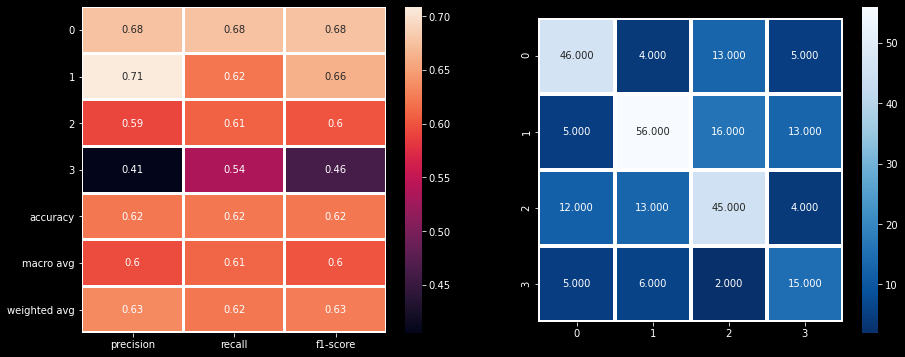

In [56]:
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
clf_report = classification_report(test_set_targets, predictions, output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, linewidths=2, annot=True)

ax2 = fig.add_subplot(122)
cm = confusion_matrix(test_set_targets, predictions)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=3, square = True, cmap = 'Blues_r');

plt.show()